In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/Courses/Feature Engneering/Project/cassava-leaf-disease-classification.zip (Unzipped Files)/'

In [ ]:
import math
import os
from os import listdir
import cv2
import numpy as np
from abc import ABCMeta, abstractmethod
#write your code here
import sys
# Import the libraries
import matplotlib.pyplot as plt
from PIL import Image

Using EdgeHistogramComputer to compute the features and saving them

In [ ]:


class DescriptorComputer:
	__metaclass__ = ABCMeta
	
	@abstractmethod
	def compute(self, frame):
		pass

class EdgeHistogramComputer(DescriptorComputer):

	def __init__(self, rows, cols):
		sqrt2 = math.sqrt(2)
		self.kernels = (np.matrix([[1,1],[-1,-1]]), \
				np.matrix([[1,-1],[1,-1]]),         \
				np.matrix([[sqrt2,0],[0,-sqrt2]]),  \
				np.matrix([[0,sqrt2],[-sqrt2,0]]),  \
				np.matrix([[2,-2],[-2,2]]));
		self.bins = [len(self.kernels)]
		self.range = [0,len(self.kernels)]
		self.rows = rows
		self.cols = cols
		self.prefix = "EDH"
		
	def compute(self, frame):
		frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
		descriptor = []
		dominantGradients = np.zeros_like(frame)
		maxGradient = cv2.filter2D(frame, cv2.CV_32F, self.kernels[0])
		maxGradient = np.absolute(maxGradient)
		for k in range(1,len(self.kernels)):
			kernel = self.kernels[k]
			gradient = cv2.filter2D(frame, cv2.CV_32F, kernel)
			gradient = np.absolute(gradient)
			np.maximum(maxGradient, gradient, maxGradient)
			indices = (maxGradient == gradient)
			dominantGradients[indices] = k
		
		frameH, frameW = frame.shape
		for row in range(self.rows):
			for col in range(self.cols):
				mask = np.zeros_like(frame)
				mask[int((frameH/self.rows)*row):int((frameH/self.rows)*(row+1)),int((frameW/self.cols)*col):int((frameW/self.cols)*(col+1))] = 255
				hist = cv2.calcHist([dominantGradients], [0], mask, self.bins, self.range)
				hist = cv2.normalize(hist, None)
				descriptor.append(hist)
		return np.concatenate([x for x in descriptor])

In [ ]:

list_image=os.listdir(path+'train_images/')
list_image=sorted(list_image)
for img_path in list_image:
    # Extract Features
  if(img_path[0]=='s' or img_path.endswith('.npy')):
    continue
  computer1 =EdgeHistogramComputer(2,2)
  
  img=cv2.imread(path+"train_images/"+img_path)
  # img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  feature = computer1.compute(img)
  feature_path = path+'feature_ghc/'+img_path+".npy"
  np.save(feature_path, feature)

In [ ]:
def distance_measuere_L2(a,b):
  #L2 distance
  norm = np.linalg.norm(a)
  norm = np.linalg.norm(b)
  normal_array = b/norm
  normal_array1 = a/norm
  L2=np.linalg.norm(normal_array1-normal_array)
  return L2

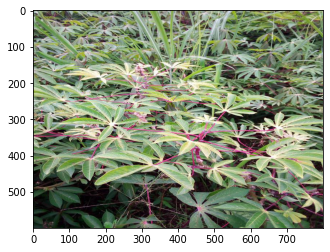

In [ ]:

# Insert the image query
searchs=['2216849948.jpg']
for s in searchs:
  img = Image.open(path+'test_images/'+s)
  # Extract its features
  
  plt.imshow(img)
  plt.show()
  img=cv2.imread(path+'test_images/'+s)
  query1 = computer1.compute(img)
  # img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  # query2  = computer.compute(img)
  
  # Python3 code to demonstrate list
  # concatenation using list comprehension 
  # using list comprehension to concat
  # query = [y for x in [query1, query2] for y in x]
  query=(query1).reshape(1,-1)
  # Calculate the similarity (distance) between images
  dists=[]
  lowest_dist=100000
  predict=''
  for feature_path in os.listdir(path+'feature_ghc/'):
    feature_load=np.load(path+'feature_ghc/'+feature_path)
    L2=distance_measuere_L2(feature_load,query)
    if(L2<lowest_dist):
      lowest_dist=L2
      predict=feature_path
  # dists=(np.linalg.norm(np.array(concated_features)- np.array(query), axis=0))
 

In [ ]:
str(predict[:-4])

'2911274899.jpg'

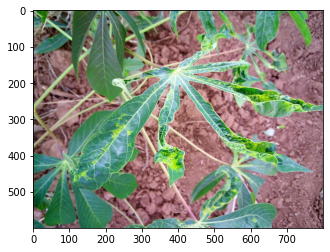

In [ ]:
predict_img = Image.open(path+'train_images/'+predict[:-4])
plt.imshow(predict_img )
plt.show()

In [ ]:
 Predicted Class : 3

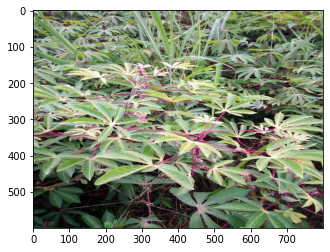

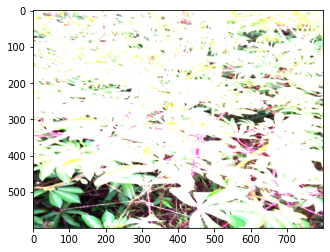

In [ ]:
#write your code here
from skimage.transform import rescale
from skimage.color import rgb2gray
for s in searchs:
  img = cv2.imread(path+'test_images/'+s)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  # img=img/255.0
  plt.imshow(img)
  plt.show()
 
  kernel1 = np.array([[1, 0, 0],
                                  [0, 1, 0],
                                  [0, 0, 1]])

  res= cv2.filter2D(img,-1,kernel1, borderType=cv2.BORDER_CONSTANT)   

  plt.imshow(res)
  plt.show()

  query1 = computer1.compute(res)
 
  query=(query1).reshape(1,-1)
 
  lowest_dist=10000
  predict=''
  for feature_path in os.listdir(path+'feature_ghc/'):
    feature_load=np.load(path+'feature_ghc/'+feature_path)
    L2=distance_measuere_L2(feature_load,query)
    if(L2<lowest_dist):
      lowest_dist=L2
      predict=feature_path

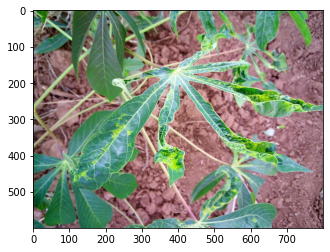

In [ ]:
predict_img = Image.open(path+'train_images/'+predict[:-4])
plt.imshow(predict_img )
plt.show()

# Predicted Class : 3
